# Working with Data - Computer Lab for Guest Lecture Julia Lane

In this computer lab we will learn more more details and practice data work to enhance the content of the lecture presented by Julia Lane on responsible data use. We will address a research question, think about data and measurement errors, and manipulate data. 

OUTLINE: 
1. Define a research question 
2. Think about what data are available 
3. Think about possible measurement errors 
4. Think about the interpretation of your results 
5. Inform your results by linking datasets 

# 1. Define a reserach question
Which Community Districts in NYC show the highest number of complaints?

# 2. Think about what data are available
Find suitable data by searching the CUSP Data Catalog https://datahub.cusp.nyu.edu/catalog. You can use Urban Profiler to investigate the Metadata associated with each dataset. Using this tool will help you to decide which attributes of the data you need to answer your question so you don't have to load the entire dataset. 

In [1191]:
import os
import pandas as pd
import numpy as np
import re
PUIdata = os.getenv('PUIDATA')

In [1192]:
# Load dataset
data = pd.read_csv('/projects/open/NYCOpenData/nycopendata/data/erm2-nwe9/1446832678/erm2-nwe9', 
                   usecols = ['Complaint Type','Community Board', 'Borough'], nrows = 10000)
data.head()


,Complaint Type,Community Board,Borough
0,Street Condition,13 BROOKLYN,BROOKLYN
1,Opinion for the Mayor,0 Unspecified,Unspecified
2,Root/Sewer/Sidewalk Condition,18 BROOKLYN,BROOKLYN
3,Illegal Parking,12 BROOKLYN,BROOKLYN
4,Benefit Card Replacement,0 Unspecified,Unspecified


In [1193]:
data['Community Board'].unique()

array(['13 BROOKLYN', '0 Unspecified', '18 BROOKLYN', '12 BROOKLYN',
       '02 STATEN ISLAND', '08 MANHATTAN', '06 BROOKLYN', '10 BRONX',
       '06 MANHATTAN', '04 BROOKLYN', '04 QUEENS', '09 MANHATTAN',
       '14 BROOKLYN', '05 MANHATTAN', '02 MANHATTAN', '10 QUEENS',
       '07 QUEENS', '02 QUEENS', '11 BROOKLYN', '05 QUEENS', '05 BROOKLYN',
       '09 QUEENS', '12 MANHATTAN', '01 BROOKLYN', '11 MANHATTAN',
       '03 BRONX', '03 STATEN ISLAND', '08 BROOKLYN', '03 BROOKLYN',
       '07 MANHATTAN', '10 MANHATTAN', '04 BRONX', '01 MANHATTAN',
       '07 BRONX', '09 BRONX', '03 MANHATTAN', '13 QUEENS', '02 BRONX',
       '12 QUEENS', '16 BROOKLYN', '08 QUEENS', '04 MANHATTAN',
       '14 QUEENS', '10 BROOKLYN', '11 QUEENS', '06 BRONX', '08 BRONX',
       '05 BRONX', '15 BROOKLYN', '02 BROOKLYN', '12 BRONX', '03 QUEENS',
       '06 QUEENS', '01 STATEN ISLAND', '01 BRONX', '01 QUEENS',
       '17 BROOKLYN', '11 BRONX', 'Unspecified QUEENS', '09 BROOKLYN',
       'Unspecified MANHATTAN'

# 3. Think about possible measurement errors
Do you see any problems regarding possible measurement error? Think about who is represented in the data, ommissions, duplications, content error, missing data, etc. 

In [1194]:
# Check if all Boroughs and Community Districts are represented in the Data 

In [1195]:
# How many unique values do we have? 

In [1196]:
len(data['Community Board'].unique())

73

In [1197]:
len(data['Complaint Type'].unique())

147

In [1198]:
# Why do we have so many? Some of them are unspecified, missing. Some might be invalid entries. 
# We should have 59 Community Districts.

Some districts are labeled as unspecified in various formats. We need to drop those rows in order to find the correct number of unique community districts.

In [1199]:
# Check for duplicates? Are these plausible?

In [1200]:
data_no_dup = data.drop_duplicates()
print ('Number of duplicates:', len(data) - len(data_no_dup))

Number of duplicates: 7484


Yes, there are only 6 boroughs and 147 complaint types. Thus its only natural that there are a significant amount of duplicate rows in the dataset.

In [1201]:
# What about missing values? Can you detect any patterns? 

In [1202]:
data.describe()

,Complaint Type,Community Board,Borough
count,10000,10000,10000
unique,147,73,6
top,Street Light Condition,0 Unspecified,BROOKLYN
freq,594,607,2825


In [1203]:
data.isnull().sum()

Complaint Type     0
Community Board    0
Borough            0
dtype: int64

No missing data

In [1204]:
# Data Editing: Is it possible to replace missing values? Is it possible to use Complaint Type 
# to fill missings in Resolution Descriptor?

Yes it is possible to replace missing values using several different functions provided by pandas. It would be possible to fill in missing values for resolution descriptor with the complaint type. Possibly take the most common resolution for that particular complaint type and use that to fill in the resolution descriptor. However we do not need resolution descriptor data for this analysis.

In [1205]:
# Generate marker for unplausible Community Districts
# How do these districts look like? 

In [1206]:
data['Bad Community Board'] = data['Community Board'].str.startswith('0 U') | data['Community Board'].str.startswith('U')
data.head()

,Complaint Type,Community Board,Borough,Bad Community Board
0,Street Condition,13 BROOKLYN,BROOKLYN,False
1,Opinion for the Mayor,0 Unspecified,Unspecified,True
2,Root/Sewer/Sidewalk Condition,18 BROOKLYN,BROOKLYN,False
3,Illegal Parking,12 BROOKLYN,BROOKLYN,False
4,Benefit Card Replacement,0 Unspecified,Unspecified,True


In [1207]:
# Drop the marked districts

In [1208]:
data_clean = data[data['Bad Community Board'] == False]
data_clean.head()

,Complaint Type,Community Board,Borough,Bad Community Board
0,Street Condition,13 BROOKLYN,BROOKLYN,False
2,Root/Sewer/Sidewalk Condition,18 BROOKLYN,BROOKLYN,False
3,Illegal Parking,12 BROOKLYN,BROOKLYN,False
5,Highway Condition,02 STATEN ISLAND,STATEN ISLAND,False
7,Noise - Commercial,08 MANHATTAN,MANHATTAN,False


In [1209]:
data_clean['Community Board'].unique()

array(['13 BROOKLYN', '18 BROOKLYN', '12 BROOKLYN', '02 STATEN ISLAND',
       '08 MANHATTAN', '06 BROOKLYN', '10 BRONX', '06 MANHATTAN',
       '04 BROOKLYN', '04 QUEENS', '09 MANHATTAN', '14 BROOKLYN',
       '05 MANHATTAN', '02 MANHATTAN', '10 QUEENS', '07 QUEENS',
       '02 QUEENS', '11 BROOKLYN', '05 QUEENS', '05 BROOKLYN', '09 QUEENS',
       '12 MANHATTAN', '01 BROOKLYN', '11 MANHATTAN', '03 BRONX',
       '03 STATEN ISLAND', '08 BROOKLYN', '03 BROOKLYN', '07 MANHATTAN',
       '10 MANHATTAN', '04 BRONX', '01 MANHATTAN', '07 BRONX', '09 BRONX',
       '03 MANHATTAN', '13 QUEENS', '02 BRONX', '12 QUEENS', '16 BROOKLYN',
       '08 QUEENS', '04 MANHATTAN', '14 QUEENS', '10 BROOKLYN',
       '11 QUEENS', '06 BRONX', '08 BRONX', '05 BRONX', '15 BROOKLYN',
       '02 BROOKLYN', '12 BRONX', '03 QUEENS', '06 QUEENS',
       '01 STATEN ISLAND', '01 BRONX', '01 QUEENS', '17 BROOKLYN',
       '11 BRONX', '09 BROOKLYN', '07 BROOKLYN', '64 MANHATTAN',
       '81 QUEENS', '55 BROOKLYN', '83

In [1210]:
len(data_clean['Community Board'].unique())

67

In [1211]:
data_clean['Bad Community Board'] = [int(i[:2]) > 18 for i in data_clean['Community Board']]

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [1212]:
data_clean = data_clean[data_clean['Bad Community Board'] == False]
data_clean.head()

,Complaint Type,Community Board,Borough,Bad Community Board
0,Street Condition,13 BROOKLYN,BROOKLYN,False
2,Root/Sewer/Sidewalk Condition,18 BROOKLYN,BROOKLYN,False
3,Illegal Parking,12 BROOKLYN,BROOKLYN,False
5,Highway Condition,02 STATEN ISLAND,STATEN ISLAND,False
7,Noise - Commercial,08 MANHATTAN,MANHATTAN,False


In [1213]:
len(data_clean['Community Board'].unique())

59

In [1214]:
data_clean['Community Board'].unique()

array(['13 BROOKLYN', '18 BROOKLYN', '12 BROOKLYN', '02 STATEN ISLAND',
       '08 MANHATTAN', '06 BROOKLYN', '10 BRONX', '06 MANHATTAN',
       '04 BROOKLYN', '04 QUEENS', '09 MANHATTAN', '14 BROOKLYN',
       '05 MANHATTAN', '02 MANHATTAN', '10 QUEENS', '07 QUEENS',
       '02 QUEENS', '11 BROOKLYN', '05 QUEENS', '05 BROOKLYN', '09 QUEENS',
       '12 MANHATTAN', '01 BROOKLYN', '11 MANHATTAN', '03 BRONX',
       '03 STATEN ISLAND', '08 BROOKLYN', '03 BROOKLYN', '07 MANHATTAN',
       '10 MANHATTAN', '04 BRONX', '01 MANHATTAN', '07 BRONX', '09 BRONX',
       '03 MANHATTAN', '13 QUEENS', '02 BRONX', '12 QUEENS', '16 BROOKLYN',
       '08 QUEENS', '04 MANHATTAN', '14 QUEENS', '10 BROOKLYN',
       '11 QUEENS', '06 BRONX', '08 BRONX', '05 BRONX', '15 BROOKLYN',
       '02 BROOKLYN', '12 BRONX', '03 QUEENS', '06 QUEENS',
       '01 STATEN ISLAND', '01 BRONX', '01 QUEENS', '17 BROOKLYN',
       '11 BRONX', '09 BROOKLYN', '07 BROOKLYN'], dtype=object)

In [1215]:
# Produce your result: Generate an indicator which ranks the Community District by complaint numbers 
# on the Community district level

In [1216]:
# Safe reduced data frame (Community District level)

In [1217]:
community_complaints = data_clean.groupby('Community Board').count()
community_complaints.drop(community_complaints.columns[[1,2]], axis=1, inplace=True)
community_complaints.columns = ['Number of Complaints']
community_complaints.reset_index(inplace=True)
community_complaints.head()

,Community Board,Number of Complaints
0,01 BRONX,82
1,01 BROOKLYN,204
2,01 MANHATTAN,101
3,01 QUEENS,190
4,01 STATEN ISLAND,203


# 4. Think about the interpretation of your results?
What do you have to keep in mind when interpreting your results? Are they generable? Does the way the data is collected influence your results? To better inform city agancies it might be good to explore in more detail the underlying dempgraphics/infrastructure of a Community District becasue this might influence 311 calls. You can do this by merging external data on the Community District level to your analysis data. 

In [1218]:
# Population by Community District
df_pop = pd.read_csv("http://cosmo.nyu.edu/~fb55/PUI2016/data//Final_Demographics.csv")
df_pop.head()

,FIPS,cd_id,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,...,"Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations","% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations",% Employed Civilian Population 16 Years And Over: Service occupations,% Employed Civilian Population 16 Years And Over: Sales and office occupations,"% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations","% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations"
0,3603701,BX08,106737,31229.95006,46.65,10.73,15.04,11.32,46.80,39.24,...,665,1518,42.66,28.95,20.89,0.24,2.65,4.60,1.40,3.20
1,3603702,BX12,134644,19966.67839,46.35,11.35,14.29,12.57,73.09,18.19,...,1156,4174,29.57,33.98,20.40,0.00,7.08,8.97,1.95,7.02
2,3603703,BX10,121209,12913.81703,45.20,8.62,13.74,12.78,61.79,26.43,...,941,3433,36.20,22.85,25.09,0.00,7.68,8.18,1.76,6.42
3,3603704,BX11,135839,35677.95453,50.09,8.10,17.43,14.09,43.22,36.45,...,2189,5592,30.06,27.86,22.24,0.00,7.03,12.81,3.60,9.20
4,3603705,BX03,172247,39405.79222,44.72,14.24,14.89,12.38,36.82,54.24,...,1437,5436,16.80,41.00,22.29,0.03,8.45,11.43,2.39,9.04


In [1219]:
# Check variables in file

In [1220]:
list(df_pop.columns.values)

['FIPS',
 'cd_id',
 'Total Population',
 'Population Density (per sq. mile)',
 '% Total Population: Male',
 '% Total Population: 18 to 24 Years',
 '% Total Population: 25 to 34 Years',
 '% Total Population: 35 to 44 Years',
 '% Population 5 Years And Over: Speak Only English',
 '% Population 5 Years And Over: Spanish or Spanish Creole',
 '% Population 5 Years And Over: Spanish or Spanish Creole: Speak English "very Well"',
 '% Population 5 Years And Over: Spanish or Spanish Creole: Speak English Less Than "very Well"',
 'Population 25 Years and over:',
 'Population 25 Years and over: Less Than High School',
 'Population 25 Years and over: High School Graduate (includes equivalency)',
 'Population 25 Years and over: Some college',
 "Population 25 Years and over: Bachelor's degree",
 "Population 25 Years and over: Master's degree",
 'Population 25 Years and over: Professional school degree',
 'Population 25 Years and over: Doctorate degree',
 '% Population 25 Years and over: Less Than Hi

In [1221]:
# How many community districts are in file? 

In [1222]:
len(df_pop['cd_id'].unique())

59

In [1223]:
# Manipulate data to get some information on demographics by Community District. 
# Think about who might be more likely to call 311

In [1224]:
# Save data frame

In [1225]:
community_demo = df_pop[['cd_id', 'Median household income (In 2014 Inflation Adjusted Dollars)']]
community_demo.columns = ['cd_id', 'median_house_income']
community_demo.head()

,cd_id,median_house_income
0,BX08,54224
1,BX12,44906
2,BX10,54962
3,BX11,47910
4,BX03,22041


In [1226]:
# Infrastructure by Community District
df_infr = pd.read_csv("http://cosmo.nyu.edu/~fb55/PUI2016/data//ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv")
df_infr.head()

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Mobile Broadband Alone or With Dialup,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,2168,2119,8121,75.64,42035,35048,404,30943,3701,6987
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,928,1891,10696,71.92,44830,36700,178,31435,5087,8130
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,639,2882,11439,69.56,47050,38700,158,32333,6209,8350
3,3603704,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,1004,17917,...,1001,2722,10197,71.24,44922,37237,122,31278,5837,7685
4,3603705,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,646,15847,...,1385,3312,18741,61.68,57556,42576,88,33408,9080,14980


In [1227]:
# Check variables in file

In [1228]:
df_infr.columns

Index(['FIPS', 'Geographic Identifier', 'Qualifying Name', 'Households',
       'Households: With An Internet Subscription',
       'Households: Dial-Up Alone', 'Households: Dsl',
       'Households: With Mobile Broadband',
       'Households: Without Mobile Broadband', 'Households: Cable Modem',
       'Households: With Mobile Broadband.1',
       'Households: Without Mobile Broadband.1', 'Households: Fiber-Optic',
       'Households: With Mobile Broadband.2',
       'Households: Without Mobile Broadband.2',
       'Households: Satellite Internet Service',
       'Households: With Mobile Broadband.3',
       'Households: Without Mobile Broadband.3',
       'Households: Two or More Fixed Broadband Types, or Other',
       'Households: With Mobile Broadband.4',
       'Households: Without Mobile Broadband.4',
       'Households: Mobile Broadband Alone or With Dialup',
       'Households: Internet Access Without A Subscription',
       'Households: No Internet Access',
       '% Househol

In [1229]:
# How many community districts are in file? 

In [1230]:
len(df_infr['Qualifying Name'].unique())

55

In [1231]:
# Manipulate data to get some information on internet/broadband useage by Community District
# Aggregate the mobile subscription data

In [1232]:
# Aggregate internet type by high and low connections

In [1233]:
# Save data frame 

In [1234]:
community_internet = df_infr[['Qualifying Name', 'Households: With Dial-Up Internet Subscription Alone', 
                              'Households: With A Broadband Internet Subscription', 
                              'Households: Without An Internet Subscription', 'Households: No Computer']]
community_internet.columns = ['Community Name', 'low_internet_conection', 'high_internet_connection',
                              'no_internet', 'no_computer']
community_internet['no_connection'] = community_internet['no_internet'] + community_internet['no_computer']
community_internet.drop(['no_internet', 'no_computer'], axis=1, inplace=True)
community_internet.head(10)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Community Name,low_internet_conection,high_internet_connection,no_connection
0,"NYC-Bronx Community District 8--Riverdale, New...",404,30943,10688
1,"NYC-Bronx Community District 12--Wakefield, Ne...",178,31435,13217
2,"NYC-Bronx Community District 10--Co-op City, N...",158,32333,14559
3,NYC-Bronx Community District 11--Pelham Parkwa...,122,31278,13522
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",88,33408,24060
5,"NYC-Bronx Community District 3 & 6--Belmont, N...",88,33408,24060
6,"NYC-Bronx Community District 7--Bedford Park, ...",0,31021,16231
7,NYC-Bronx Community District 5--Morris Heights...,54,25772,18873
8,"NYC-Bronx Community District 4--Concourse, New...",316,27971,19648
9,"NYC-Bronx Community District 9--Castle Hill, N...",180,45261,18570


# 5. Inform your results by linking datasets
Now you want to link the three data frames to produce summary statistics for Community Districts which show a high number of complaints vs. Community Districts which show a lower number of complaints. Please keep in mind that the identifiers used for the linkage (Community Dostrict IDs) should be recored the same way. Use regular expressions to harmonize the identifiers if possible. The identifiers should look like BK01, BK02, etc.
https://docs.python.org/2/library/re.html

In [1235]:
# Harmonize identifier of dataframe 1

In [1236]:
community_complaints['Community Board'].unique()

array(['01 BRONX', '01 BROOKLYN', '01 MANHATTAN', '01 QUEENS',
       '01 STATEN ISLAND', '02 BRONX', '02 BROOKLYN', '02 MANHATTAN',
       '02 QUEENS', '02 STATEN ISLAND', '03 BRONX', '03 BROOKLYN',
       '03 MANHATTAN', '03 QUEENS', '03 STATEN ISLAND', '04 BRONX',
       '04 BROOKLYN', '04 MANHATTAN', '04 QUEENS', '05 BRONX',
       '05 BROOKLYN', '05 MANHATTAN', '05 QUEENS', '06 BRONX',
       '06 BROOKLYN', '06 MANHATTAN', '06 QUEENS', '07 BRONX',
       '07 BROOKLYN', '07 MANHATTAN', '07 QUEENS', '08 BRONX',
       '08 BROOKLYN', '08 MANHATTAN', '08 QUEENS', '09 BRONX',
       '09 BROOKLYN', '09 MANHATTAN', '09 QUEENS', '10 BRONX',
       '10 BROOKLYN', '10 MANHATTAN', '10 QUEENS', '11 BRONX',
       '11 BROOKLYN', '11 MANHATTAN', '11 QUEENS', '12 BRONX',
       '12 BROOKLYN', '12 MANHATTAN', '12 QUEENS', '13 BROOKLYN',
       '13 QUEENS', '14 BROOKLYN', '14 QUEENS', '15 BROOKLYN',
       '16 BROOKLYN', '17 BROOKLYN', '18 BROOKLYN'], dtype=object)

In [1237]:
community_complaints['cd_num'] = community_complaints['Community Board'].str[:2]
community_complaints['cd_boro'] = community_complaints['Community Board'].str[3:]
cd_id = {'BRONX': 'BX', 'BROOKLYN': 'BK', 'MANHATTAN': 'MN', 'QUEENS': 'QN', 'STATEN ISLAND': 'SI'}
community_complaints.replace({'cd_boro': cd_id}, inplace=True)
community_complaints['cd_id'] = community_complaints.cd_boro + community_complaints.cd_num
community_complaints.drop(['Community Board', 'cd_num', 'cd_boro'], axis=1, inplace=True)
community_complaints.columns = ['num_complaints', 'cd_id']
community_complaints.head()

,num_complaints,cd_id
0,82,BX01
1,204,BK01
2,101,MN01
3,190,QN01
4,203,SI01


In [1238]:
community_complaints['cd_id'].unique()

array(['BX01', 'BK01', 'MN01', 'QN01', 'SI01', 'BX02', 'BK02', 'MN02',
       'QN02', 'SI02', 'BX03', 'BK03', 'MN03', 'QN03', 'SI03', 'BX04',
       'BK04', 'MN04', 'QN04', 'BX05', 'BK05', 'MN05', 'QN05', 'BX06',
       'BK06', 'MN06', 'QN06', 'BX07', 'BK07', 'MN07', 'QN07', 'BX08',
       'BK08', 'MN08', 'QN08', 'BX09', 'BK09', 'MN09', 'QN09', 'BX10',
       'BK10', 'MN10', 'QN10', 'BX11', 'BK11', 'MN11', 'QN11', 'BX12',
       'BK12', 'MN12', 'QN12', 'BK13', 'QN13', 'BK14', 'QN14', 'BK15',
       'BK16', 'BK17', 'BK18'], dtype=object)

In [1239]:
# Harmonize identifier of dataframe 2

In [1240]:
community_demo['cd_id'].unique()

array(['BX08', 'BX12', 'BX10', 'BX11', 'BX03', 'BX06', 'BX07', 'BX05',
       'BX04', 'BX09', 'BX01', 'BX02', 'MN12', 'MN09', 'MN10', 'MN11111',
       'MN08', 'MN07', 'MN05', 'MN04', 'MN06', 'MN03', 'MN01', 'MN02',
       'SI03', 'SI02', 'SI01', 'BK01', 'BK04', 'BK03', 'BK02', 'BK06',
       'BK08', 'BK16', 'BK05', 'BK18', 'BK17', 'BK09', 'BK07', 'BK10',
       'BK12', 'BK14', 'BK15', 'BK11', 'BK13', 'QN01', 'QN03', 'QN07',
       'QN11', 'QN13', 'QN08', 'QN04', 'QN06', 'QN02', 'QN05', 'QN09',
       'QN12', 'QN10', 'QN14'], dtype=object)

In [1241]:
community_demo.head()

,cd_id,median_house_income
0,BX08,54224
1,BX12,44906
2,BX10,54962
3,BX11,47910
4,BX03,22041


In [1242]:
community_demo.replace('MN11111', 'MN11', inplace=True)
community_demo['cd_id'].unique()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


array(['BX08', 'BX12', 'BX10', 'BX11', 'BX03', 'BX06', 'BX07', 'BX05',
       'BX04', 'BX09', 'BX01', 'BX02', 'MN12', 'MN09', 'MN10', 'MN11',
       'MN08', 'MN07', 'MN05', 'MN04', 'MN06', 'MN03', 'MN01', 'MN02',
       'SI03', 'SI02', 'SI01', 'BK01', 'BK04', 'BK03', 'BK02', 'BK06',
       'BK08', 'BK16', 'BK05', 'BK18', 'BK17', 'BK09', 'BK07', 'BK10',
       'BK12', 'BK14', 'BK15', 'BK11', 'BK13', 'QN01', 'QN03', 'QN07',
       'QN11', 'QN13', 'QN08', 'QN04', 'QN06', 'QN02', 'QN05', 'QN09',
       'QN12', 'QN10', 'QN14'], dtype=object)

In [1243]:
# Harmonize identifier of dataframe 3

In [1244]:
community_internet.drop_duplicates(inplace=True)
community_internet['Community Name'].values

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/util/decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


array(['NYC-Bronx Community District 8--Riverdale, New York',
       'NYC-Bronx Community District 12--Wakefield, New York',
       'NYC-Bronx Community District 10--Co-op City, New York',
       'NYC-Bronx Community District 11--Pelham Parkway, New York',
       'NYC-Bronx Community District 3 & 6--Belmont, New York',
       'NYC-Bronx Community District 7--Bedford Park, New York',
       'NYC-Bronx Community District 5--Morris Heights, New York',
       'NYC-Bronx Community District 4--Concourse, New York',
       'NYC-Bronx Community District 9--Castle Hill, New York',
       'NYC-Bronx Community District 1 & 2--Hunts Point, New York',
       'NYC-Manhattan Community District 12--Washington Heights, New York',
       'NYC-Manhattan Community District 9--Hamilton Heights, New York',
       'NYC-Manhattan Community District 10--Central Harlem PUMA, New York',
       'NYC-Manhattan Community District 11--East Harlem PUMA, New York',
       'NYC-Manhattan Community District 8--Upper Eas

In [1245]:
cd_id1 = {'Bronx': 'BX', 'Brooklyn': 'BK', 'Manhattan': 'MN', 'Queens': 'QN', 'Staten': 'SI'}
community_internet['cd_boro'] = community_internet['Community Name'].str.extract('(?<=^....)(?P<letter>[a-zA-Z]+)',
                                                                                expand=True)
community_internet['cd_num'] = community_internet['Community Name'].str.extract('([0-9]+)',
                                                                                expand=True)

community_internet['cd_num'] = community_internet['cd_num'].apply(lambda x: '{0:0>2}'.format(x))
community_internet.replace({'cd_boro': cd_id1}, inplace=True)
community_internet['cd_id'] = community_internet.cd_boro + community_internet.cd_num
community_internet.drop(['Community Name', 'cd_num', 'cd_boro'], axis=1, inplace=True)
community_internet.head()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,low_internet_conection,high_internet_connection,no_connection,cd_id
0,404,30943,10688,BX08
1,178,31435,13217,BX12
2,158,32333,14559,BX10
3,122,31278,13522,BX11
4,88,33408,24060,BX03


Because certain rows for internet connection data contain two community districts, I assumed that 50% of the counts were attributed to each of the two community districts.

In [1246]:

for index, row in community_internet.iterrows():
    if row['cd_id'] == 'BX03':
        temp = pd.DataFrame([row])
    elif row['cd_id'] == 'BX01':
        temp = temp.append([row])
    elif row['cd_id'] == 'MN01':
        temp = temp.append([row])
    elif row['cd_id'] == 'MN04':
        temp = temp.append([row])
new_rows = temp
new_rows['low_internet_conection'] = (temp['low_internet_conection'].values)/2
new_rows['high_internet_connection'] = (temp['high_internet_connection'].values)/2
new_rows['no_connection'] = (temp['no_connection'].values)/2

new_rows.replace('BX03', 'BX06', inplace=True)
new_rows.replace('BX01', 'BX02', inplace=True)
new_rows.replace('MN01', 'MN02', inplace=True)
new_rows.replace('MN04', 'MN05', inplace=True)
community_internet = community_internet.append(new_rows, ignore_index=True)

In [1247]:
new_rows

,low_internet_conection,high_internet_connection,no_connection,cd_id
4,44.0,16704.0,12030.0,BX06
10,0.0,15479.0,10616.5,BX02
18,26.5,34888.0,6466.5,MN05
22,66.0,37169.5,4752.5,MN02


In [1248]:

community_internet.loc[4,0:3] = community_internet.ix[4][0:3].values/2
community_internet.head()

,low_internet_conection,high_internet_connection,no_connection,cd_id
0,404.0,30943.0,10688.0,BX08
1,178.0,31435.0,13217.0,BX12
2,158.0,32333.0,14559.0,BX10
3,122.0,31278.0,13522.0,BX11
4,44.0,16704.0,12030.0,BX03


In [1249]:
community_internet['cd_id'].unique()

array(['BX08', 'BX12', 'BX10', 'BX11', 'BX03', 'BX07', 'BX05', 'BX04',
       'BX09', 'BX01', 'MN12', 'MN09', 'MN10', 'MN11', 'MN08', 'MN07',
       'MN04', 'MN06', 'MN03', 'MN01', 'SI03', 'SI02', 'SI01', 'BK01',
       'BK04', 'BK03', 'BK02', 'BK06', 'BK08', 'BK16', 'BK05', 'BK18',
       'BK17', 'BK09', 'BK07', 'BK10', 'BK12', 'BK14', 'BK15', 'BK11',
       'BK13', 'QN01', 'QN03', 'QN07', 'QN11', 'QN13', 'QN08', 'QN04',
       'QN06', 'QN02', 'QN05', 'QN09', 'QN12', 'QN10', 'QN14', 'BX06',
       'BX02', 'MN05', 'MN02'], dtype=object)

In [1250]:
# Link the 3 dataframes

In [1251]:
complaint_demo = pd.merge(community_demo, community_complaints, on='cd_id', how='left')
complaint_demo.head()

,cd_id,median_house_income,num_complaints
0,BX08,54224,105
1,BX12,44906,156
2,BX10,54962,91
3,BX11,47910,86
4,BX03,22041,63


In [1252]:
complaint_demo_internet = pd.merge(complaint_demo, community_internet, on='cd_id', how='left')
complaint_demo_internet.head()

,cd_id,median_house_income,num_complaints,low_internet_conection,high_internet_connection,no_connection
0,BX08,54224,105,404.0,30943.0,10688.0
1,BX12,44906,156,178.0,31435.0,13217.0
2,BX10,54962,91,158.0,32333.0,14559.0
3,BX11,47910,86,122.0,31278.0,13522.0
4,BX03,22041,63,44.0,16704.0,12030.0


In [1253]:
len(complaint_demo_internet)

59

In [1254]:
# Are the demographics and infrastructure different in Community Districts that show more complaints than others?

### Median Household Income Analysis

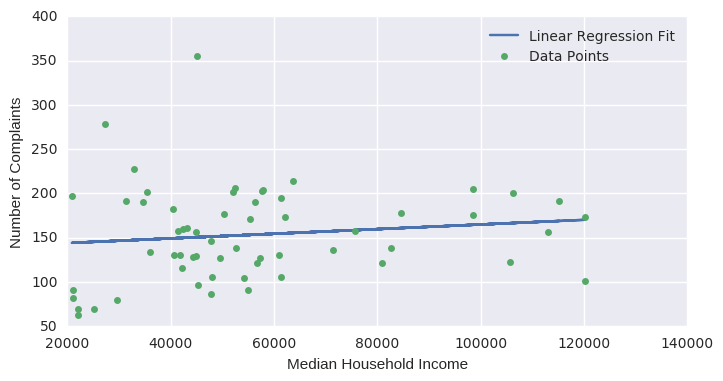

In [1255]:
import matplotlib.pyplot as plt
import seaborn
import statsmodels.formula.api as smf
%matplotlib inline

lm_income = smf.ols(formula=' num_complaints ~ median_house_income', data=complaint_demo_internet).fit()
pred_income = lm_income.predict()

plt.figure(figsize=(8,4))
plt.plot(complaint_demo_internet.median_house_income, pred_income, label='Linear Regression Fit')
plt.plot(complaint_demo_internet.median_house_income, complaint_demo_internet.num_complaints, 
                  'o', markersize=5, label='Data Points')
plt.xlabel('Median Household Income')
plt.ylabel('Number of Complaints')
plt.legend()

#### Figure 1:
Figure 1 illustrates the relationship between the total number of complaints per community district and the the median househould income for each community district. Based on visual analysis there appears to be no positve or negative relationship between the number of complaints and the median household income.

#### Perform Pearson Correlation Test to determine any statistical relationship between complaints and income
alpha = .1

In [1256]:
import math
import scipy.stats as st
corr_income, p_income = st.pearsonr(complaint_demo_internet.median_house_income, complaint_demo_internet.num_complaints)
print ('correlation coefficient: ', corr_income)
print ('p-value: ', p_income)

correlation coefficient:  0.129253642185
p-value:  0.329225906307


The p-value is the probability of seeing the observed correlation or stronger, if no correlation exists. Therefore because of the high p-value (>.05), we can conclude there is not a statistically significant correlation between median househould income and number of complaints

### High Internet Connection Analysis

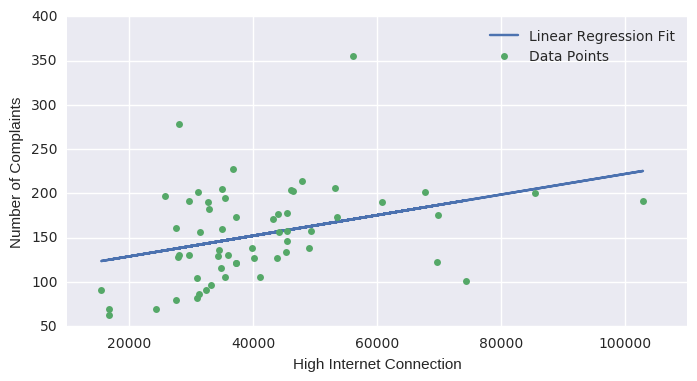

In [1257]:
lm_high_int = smf.ols(formula=' num_complaints ~ high_internet_connection', data=complaint_demo_internet).fit()
pred_high_int = lm_high_int.predict()

plt.figure(figsize=(8,4))
plt.plot(complaint_demo_internet.high_internet_connection, pred_high_int, label='Linear Regression Fit')
plt.plot(complaint_demo_internet.high_internet_connection, complaint_demo_internet.num_complaints, 
                  'o', markersize=5, label='Data Points')
plt.xlabel('High Internet Connection')
plt.ylabel('Number of Complaints')
plt.legend()

#### Figure 2:
Figure 2 illustrates the relationship between the total number of complaints per community district and the households who have a high internet connection for each community district. Based on visual analysis there appears to be some positve relationship between the number of complaints and the median household income.

#### Perform Pearson Correlation Test to determine any statistical relationship between complaints and high internet connection


In [1258]:
import math
import scipy.stats as st
corr_high_int, p_high_int = st.pearsonr(complaint_demo_internet.high_internet_connection, complaint_demo_internet.num_complaints)
print ('correlation coefficient: ', corr_high_int)
print ('p-value: ', p_high_int)

correlation coefficient:  0.354065418971
p-value:  0.00593817871753


The p-value is the probability of seeing the observed correlation or stronger, if no correlation exists. Therefore because of the low p-value (<.05), we can conclude there is a statistically significant correlation between households with high internet connection and number of complaints

### Low Internet Connection Analysis

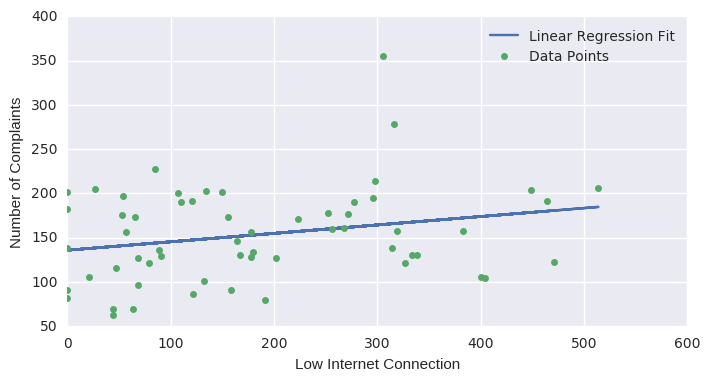

In [1259]:
lm_low_int = smf.ols(formula=' num_complaints ~ low_internet_conection', data=complaint_demo_internet).fit()
pred_low_int = lm_low_int.predict()

plt.figure(figsize=(8,4))
plt.plot(complaint_demo_internet.low_internet_conection, pred_low_int, label='Linear Regression Fit')
plt.plot(complaint_demo_internet.low_internet_conection, complaint_demo_internet.num_complaints, 
                  'o', markersize=5, label='Data Points')
plt.xlabel('Low Internet Connection')
plt.ylabel('Number of Complaints')
plt.legend()

#### Figure 3:
Figure 3 illustrates the relationship between the total number of complaints per community district and the households who have a low internet connection for each community district. Based on visual analysis there appears to be some positve relationship between the number of complaints and households who have low internet connection.

#### Perform Pearson Correlation Test to determine any statistical relationship between complaints and low internet connection


In [1260]:
import math
import scipy.stats as st
corr_low_int, p_low_int = st.pearsonr(complaint_demo_internet.low_internet_conection, complaint_demo_internet.num_complaints)
print ('correlation coefficient: ', corr_low_int)
print ('p-value: ', p_low_int)

correlation coefficient:  0.248909984418
p-value:  0.0572960656639


The p-value is the probability of seeing the observed correlation or stronger, if no correlation exists. Therefore because of the low p-value (<.05), we can conclude there is a statistically significant correlation between households with low internet connection and number of complaints

### No Connection Analysis

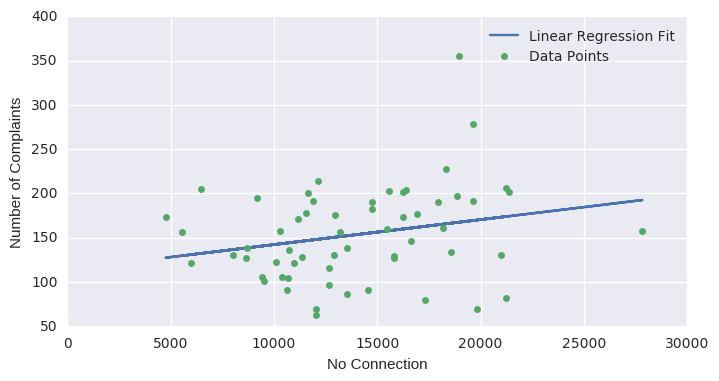

In [1261]:
lm_no_int = smf.ols(formula=' num_complaints ~ no_connection', data=complaint_demo_internet).fit()
pred_no_int = lm_no_int.predict()

plt.figure(figsize=(8,4))
plt.plot(complaint_demo_internet.no_connection, pred_no_int, label='Linear Regression Fit')
plt.plot(complaint_demo_internet.no_connection, complaint_demo_internet.num_complaints, 
                  'o', markersize=5, label='Data Points')
plt.xlabel('No Connection')
plt.ylabel('Number of Complaints')
plt.legend()

#### Figure 4:
Figure 4 illustrates the relationship between the total number of complaints per community district and the households who have no internet connection for each community district. Based on visual analysis there appears to be some positve relationship between the number of complaints and households who have no internet connection.

#### Perform Pearson Correlation Test to determine any statistical relationship between complaints and no internet connection

In [1262]:
import math
import scipy.stats as st
corr_no_int, p_no_int = st.pearsonr(complaint_demo_internet.no_connection, complaint_demo_internet.num_complaints)
print ('correlation coefficient: ', corr_no_int)
print ('p-value: ', p_no_int)

correlation coefficient:  0.245721664789
p-value:  0.0606671107254


The p-value is the probability of seeing the observed correlation or stronger, if no correlation exists. Therefore because of the low p-value (<.05), we can conclude there is a statistically significant correlation between households with no internet connection and number of complaints